# Kelompok 9 : Recommender System menggunakan Implementasi Hybrid Collaborative Filtering dan Content Based pada Data Movies


1.   Nizar Mayraldo (0511194000004)
2.   Dyandra Paramitha Widyadhana (05111940000119)
3.   Taqarra Rayhan (05111940000121)



# **Proses/Tahapan Project**:<br> 
**[[Introduksi]](#1)**<br>
**[Explorasi Dataset]** yang terdiri atas
1. [Import Data](#2)
2. [EDA](#3)
**[Data Preprocessing]** yang terdiri atas
1. [Data Preprocessing Awal](#4) 
2. [Data Preprocessing Akhir](#5) 
**[Pembuatan Model]** yang terdiri atas
1. [Content Based](#6) 
2. [Collaborative Filtering](#7)
3. [Hybrid Implementation](#8)
**[[Hasil Pembahasan dan Analisis]](#9)**<br>

<a name="1"></a>
# Introduksi

Topik final project yang kita lakukan yaitu 'Recommender System menggunakan Implementasi Hybrid Collaborative Filtering dan Content Based pada Data Movies'. Referensi/inspirasi yang kami gunakan berasal dari beberapa paper seperti 
1. Gupta, Meenu & Co, Gupta & Thakkar, Aditya & Gupta, Vishal & Pratap, Dhruv & Rathore, Singh. (2021). Movie Recommender System Using Collaborative Filtering. 978-979.
https://www.researchgate.net/publication/348239082_Movie_Recommender_System_Using_Collaborative_Filtering
2. Burke, R. Hybrid Recommender Systems: Survey and Experiments. User Model User-Adap Inter 12, 331–370 (2002). https://doi.org/10.1023/A:1021240730564
3. Ling, G., Lyu, M.R., & King, I. (2014). Ratings meet reviews, a combined approach to recommend. RecSys '14. https://www.semanticscholar.org/paper/Ratings-meet-reviews%2C-a-combined-approach-to-Ling-Lyu/7a9a19bf8205bac4b6e374ce46ce4cc14969dce9

## Mengenai Recommender System
Recommender system adalah sebuah sistem yang mengacu pada memprediksi sejumlah item atau data untuk pengguna di masa mendatang, kemudian dijadikan rekomendasi item paling teratas. Salah satu alasan mengapa perlu digunakannya recommendation system karena pengguna memiliki banyak pilihan untuk digunakan karena prevalensi internet.

Terdapat 2 jenis recommender system pada umumnya yaitu: 
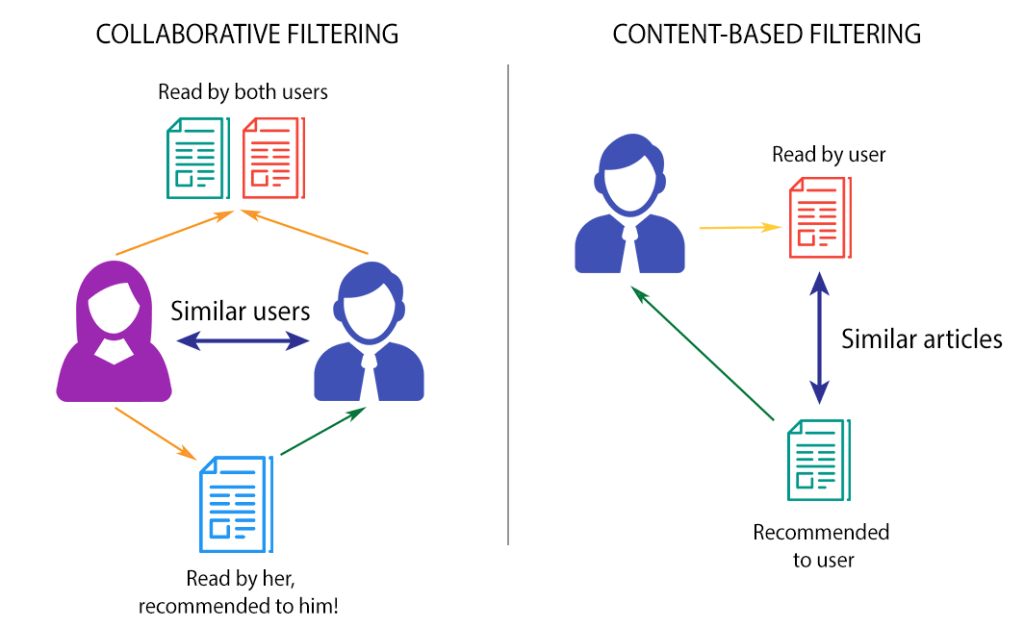

Recommender System dengan pendekatan Collaborative Filtering akan bekerja dengan cara menghimpun feedback pengguna dalam bentuk rating bagi item-item dalam suatu domain yang diberikan dan memanfaatkan kemiripan dan perbedaan antar profil dari beberapa pengguna dalam menentukan bagaimana merekomendasi suatu item. Collaborative Filtering memanfaatkan transaksi suatu produk / item yang didasarkan kepada perilaku / kebiasaan si pengguna. Pendekatan CF dapat bekerja dalam domain dimana terdapat sedikit content yang berasosiasi dengan item atau ditempat dimana content sulit dianalisis menggunakan komputer seperti ide, opini, dll.

Recommender System dengan pendekatan Content Based akan menyediakan rekomendasi dengan cara membandingkan representasi content (isi) yang dikandung oleh suatu item terhadap representasi isi dari item menarik pengguna. Namun pendekatan ini tidak selalu disukai pengguna karena meskipun memilki kesamaan content belum tentu isi tersebut bagus dan menarik bagi orang karena kurangnya review terhadap content tersebut. Pendekatan CF mempunyai kemampuan untuk menyediakan rekomendasi yang tidak terduga atau tidak disengaja, misalnya dapat merekomendasikan item yang relevan kepada pengguna sekaligus tidak mengandung content dari profil pengguna tersebut. 

Diharapkan dengan menggabungkan recommender system CF dengan Content Based dapat memberikan rekomendasi item atau produk yang lebih baik karena mempertimbangkan ulasan asosisasi dari pengguna yang mirip namun tetap memberikan rekomendasi yang sesuai dengan kemiripan content yang disukai oleg pengguna.




## Implementasi yang Digunakan
Recommender System yang ingin kita implementasikan merupakan recommender system hybrid, dimana sistem merupakan gabungan antara metode content based filtering dengan collaborative filtering. 

Content based yang diimplementasikan menggunakan konsep perhitungan vector, TF-IDF, dan Cosine Similarity yang intinya dikonversikan dari data / text menjadi berbentuk vektor, sedangkan Collaborative Filtering menggunakan algoritma untuk memprediksi rating yang akan diberikan oleh suatu user. 

Dari kedua metode ini, akan dibuat hybrid implementation dimana kedua jenis metode akan digunakan untuk memberikan rekomendasi yang lebih akurat terhadap user. 

## Dataset Yang Digunakan
Dataset yang digunakan mengacu pada https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset. 

Dataset ini adalah kumpulan data yang dikumpulkan dari TMDB dan GroupLens.
Detail Film, Kredit, dan Kata Kunci telah dikumpulkan dari TMDB Open API. Produk ini menggunakan API TMDb tetapi tidak didukung atau disertifikasi oleh TMDb. API mereka juga menyediakan akses ke data di banyak film tambahan, aktor dan aktris, anggota kru, dan acara TV. Tautan dan Peringkat Film telah diperoleh dari situs web Resmi GroupLens. 

# Install Libraries

In [ ]:
pip install surprise # untuk melakukan collaborative filtering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fuzzywuzzy # untuk melakukan fuzzy matching

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# library standar untuk preprocessing dan EDA
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import seaborn as sns
pd.options.display.max_columns = None

import warnings; warnings.simplefilter('ignore')

In [ ]:
# membantu mengubah format json --> pandas
from ast import literal_eval

# word embedding
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# untuk melakukan stemming
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet

# untuk collaborative filtering
from surprise import Reader, Dataset, SVD, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, SVDpp, NMF, CoClustering, SlopeOne
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split



In [ ]:
# untuk EDA
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pandas_profiling import ProfileReport
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

<a name="2"></a>
# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Links 
Links berisi beberapa id yang didapatkan dari Grouplens, IMDB ID, TMDB ID. 

In [ ]:
path = "/content/drive/MyDrive/Data Mining/Tugas/FP/Movies Recommendation System/links_small.csv"
links_small = pd.read_csv(path)

links_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


#### Keywords
Tabel keywords berisi id dan keywords. Keyword berisi film id dan juga keyword yang mendeskripsikan film secara pendek. 

In [ ]:
path = "/content/drive/MyDrive/Data Mining/Tugas/FP/Movies Recommendation System/keywords.csv"
keywords = pd.read_csv(path)
keywords['id'] = keywords['id'].astype('int')

keywords .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


#### Ratings
Tabel ratings berisi rating dari setiap user untuk film-film yang telah ditontonnya. Tabel ratings berisi userId, movieId, rating dari setiap user, dan timestamp rating dibuat. 

In [ ]:
path = "/content/drive/MyDrive/Data Mining/Tugas/FP/Movies Recommendation System/ratings_small.csv"
ratings = pd.read_csv(path)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


#### Credits
Tabel credits berisi id film, informasi cast dan informasi crew. Informasi masih berbentuk object dikarenakan isinya berisi json. 

In [ ]:
path = "/content/drive/MyDrive/Data Mining/Tugas/FP/Movies Recommendation System/credits.csv"
credits = pd.read_csv(path)
credits['id'] = credits['id'].astype('int')

credits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


#### Metadata
Tabel metadata berisi informasi tentang film yang diambil dari TMDB dan IMDB. Tabel metadata berisi informasi-informasi penting mengenai setiap film, seperti franchise,  budget, genre, bahasa, judul, overview, popularitas, perusahaan dan negara produksi, tanggal rilis, penghasilan, runtime, tagline, video, banyak rating, dan rata-rata rating. 

In [ ]:
path = "/content/drive/MyDrive/Data Mining/Tugas/FP/Movies Recommendation System/movies_metadata.csv"
metadata = pd.read_csv(path)

metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# Exploration & Data Preprocessing

<a name="4"></a>
## Data Preprocessing Awal
Data Preprocessing awal ini digunakan untuk mengubah beberapa tipe data dan juga format dari dataset yang dimiliki, dikarenakan beberapa fitur masih menggunakan format json. Hal ini dilakukan sebelum EDA agar dapat membaca data untuk digunakan pada EDA.  

In [ ]:
# fungsi bantuan untuk mengkonversi fitur menjadi data type integer
def convert_to_int_helper(feature):
    try:
        return int(feature)
    except:
        return np.nan

In [ ]:
# fungsi bantuan untuk mengkonversi fitur menjadi data type float
def convert_to_float_helper(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
# fungsi bantuan untuk mengubah format json menjadi readable
# mengambil nama dari dictionary (json)
def literal_eval_helper(feature):
    metadata[feature] = metadata[feature].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] 
                                                                       if isinstance(x, list) else [])



Beberapa fitur yang akan diubah formatnya untuk pertama (bagi EDA) adalah genre, production_companies, production_coutnries, spoken_languages

In [ ]:
list_of_features = ['genres', 'production_companies', 'production_countries', 'spoken_languages']
for feature in list_of_features:
    literal_eval_helper(feature)

In [ ]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Mengubah beberapa tipe data menjadi integer, seperti fitur id

In [ ]:
metadata['id'] = metadata['id'].apply(convert_to_int_helper)
links_small['tmdbId'].apply(convert_to_int_helper)

0          862.0
1         8844.0
2        15602.0
3        31357.0
4        11862.0
          ...   
9120    402672.0
9121    315011.0
9122    391698.0
9123    137608.0
9124    410803.0
Name: tmdbId, Length: 9125, dtype: float64

In [ ]:
tmdb_df = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [ ]:
metadata['popularity'] = metadata['popularity'].apply(convert_to_float_helper)

### Menggabungkan Dataset Metadata dengan TMDB
Dataset metadata akan digabungkan dengan dataset TMDB. Hal ini dilakukan untuk melakukan pengecekan terhadap isi metadata, sehingga dicocokkan dengan data yang dimiliki pada TMDB. Untuk melakukan ini, dataset metadata dan TMDB memiliki kesamaan yaitu id (dari metadata['id'] dan links_small['tmbdId'])

In [ ]:
movies_links = metadata[metadata['id'].isin(tmdb_df)]

In [ ]:
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9099 entries, 0 to 45265
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9099 non-null   object 
 1   belongs_to_collection  1674 non-null   object 
 2   budget                 9099 non-null   object 
 3   genres                 9099 non-null   object 
 4   homepage               1974 non-null   object 
 5   id                     9099 non-null   float64
 6   imdb_id                9099 non-null   object 
 7   original_language      9099 non-null   object 
 8   original_title         9099 non-null   object 
 9   overview               9087 non-null   object 
 10  popularity             9099 non-null   float64
 11  poster_path            9096 non-null   object 
 12  production_companies   9099 non-null   object 
 13  production_countries   9099 non-null   object 
 14  release_date           9099 non-null   object 
 15  rev

Mengambil tahun rilis dari film

In [ ]:
movies_links['year'] = pd.to_datetime(movies_links['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] 
                                                                           if x != np.nan else np.nan)

<a name="3"></a>
## EDA (Exploratory Data Analysis) 

#### Popularitas Film

Text(0.5, 1.0, 'Popular Movies')

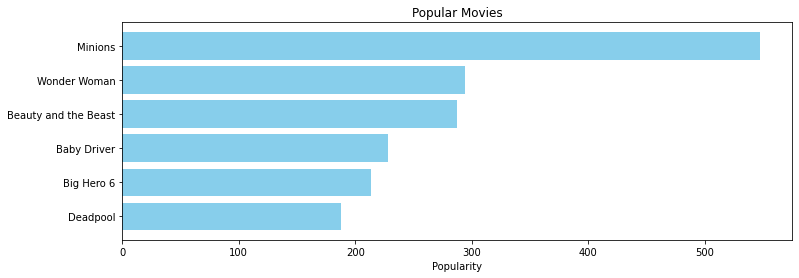

In [ ]:
pop = metadata.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Dari visualisasi data diatas dapat dilihat bahwa film minions memiliki jumlah popularity yang cukup banyak dengan jumlah diatas 500. sehingga Minions merupakan film yang paling populer.

### Distribusi Negara Produksi
Dataset mayoritas terdiri dari film berbahasa inggris. Namun, biasanya film tertentu diambil di berbagai lokasi. Di sini kita akan mencoba melihat lokasi-lokasi dari produksi film tersebut. 

In [ ]:
movies = movies_links.copy()

In [ ]:
# mengambil data negara saja
x = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
x.name = 'countries'

In [ ]:
movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


In [ ]:
df_country = movies.drop('production_countries', axis=1).join(x)

## menghitung jumlah film per negara
df_country = pd.DataFrame(df_country['countries'].value_counts())
df_country['country'] = df_country.index
df_country.columns = ['Total Movies', 'Country']
df_country = df_country.reset_index().drop('index', axis=1)

In [ ]:
df_country.head()

,Total Movies,Country
0,6853,United States of America
1,1206,United Kingdom
2,704,France
3,545,Germany
4,359,Canada


Dari data di atas, dapat terlihat bahwa negara paling sering dijadikan lokasi produksi yaitu United States of America dengan total 6853 film, kemudian disusul oleh United Kingdom dengan 1206 total, dan France dengan 704. 

In [ ]:
data = dict(type = 'choropleth', locations = df_country['Country'],
           colorscale = 'Agsunset', locationmode = 'country names', z = df_country['Total Movies'],
           text = df_country['Country'], marker = dict(line = dict(color = 'rgb(255,255,255)',width=1)),
           colorbar = {'title' : 'Total Movies per Negara'})

In [ ]:
layout = dict(title = 'Negara Diproduksi',
             geo = dict(showframe= False,
                       projection = {'type' : 'mercator'}))

In [ ]:
countrymap = go.Figure(data=[data], layout=layout)
iplot(countrymap)

### Distribusi Franchise Film
Pada bagian ini, kita akan melihat franchise film mana yang paling menarik/paling populer. Tidak semua film memiliki/merupakan bagian dari sebuah franchise. 

In [ ]:
# mengambil film2 yang memiliki franchise
df_franchise = movies[movies['belongs_to_collection'].notnull()] 

# melakukan pengubahan format pada kolom
df_franchise['belongs_to_collection'] = df_franchise['belongs_to_collection'].apply(literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_franchise = df_franchise[df_franchise['belongs_to_collection'].notnull()]

In [ ]:
pivotfran_df = pd.pivot_table(df_franchise,
                              index = 'belongs_to_collection',
                              values='revenue',
                              aggfunc={'revenue':['count','sum']}).reset_index()

In [ ]:
pivotfran_df.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,sum
273,Harry Potter Collection,8,7.707367e+09
324,James Bond Collection,26,7.106970e+09
548,Star Wars Collection,7,6.378438e+09
631,The Fast and the Furious Collection,7,3.886334e+09
766,Transformers Collection,4,3.761159e+09
451,Pirates of the Caribbean Collection,4,3.727385e+09
335,Jurassic Park Collection,4,3.031484e+09
523,Shrek Collection,4,2.955807e+09
653,The Hunger Games Collection,4,2.944163e+09
648,The Hobbit Collection,3,2.935523e+09


In [ ]:
pivotfran_df.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,sum
324,James Bond Collection,26,7.106970e+09
232,Friday the 13th Collection,11,3.735195e+08
189,Dragon Ball Z (Movie) Collection,11,5.035300e+07
273,Harry Potter Collection,8,7.707367e+09
743,The Up Series,8,2.380730e+05
586,The Amityville Horror Collection,8,2.133471e+08
17,A Nightmare on Elm Street Collection,8,3.635916e+08
692,The Muppet Collection,7,4.001244e+08
509,Saw Collection,7,8.783078e+08
268,Halloween Collection,7,2.095032e+08


In [ ]:
p = pivotfran_df.sort_values('count', ascending=False)

In [ ]:
fig = px.scatter(p.head(25), x="count", y="sum",size="sum", color="belongs_to_collection",
                 hover_name="count", log_x=True, size_max=60)
fig.show()

Dari visualisasi diatas dapat dilihat bahwa franchise James Bond memiliki total film terbanyak yaitu 26. Meskipun total filmnya banyak tetapi total revenue tidak mempengaruhi total film seperti Harry Potter yang memiliki revenue lebih banyak tetapi film franchise Harry Potter hanya ada 8

### Distribusi Perusahaan Produksi Film
Pada bagian ini, kita ingin melihat distribusi dari perusahaan yang memproduksi film. 

In [ ]:
x = movies.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
x.name = 'p_companies'

In [ ]:
df_company = movies.drop('production_companies', axis=1).join(x)

In [ ]:
df_company_count = pd.pivot_table(
    df_company,
    values=["title"],
    index=["p_companies"],
    aggfunc="count"
)

In [ ]:
df_company_count = df_company_count.rename(columns={"title": "total"})

In [ ]:
df_company_count.sort_values('total',ascending=False)

,total
p_companies,
Warner Bros.,619
Universal Pictures,515
Paramount Pictures,508
Twentieth Century Fox Film Corporation,436
Metro-Goldwyn-Mayer (MGM),301
...,...
Hannibal Classics,1
Hank Levine Film,1
Hanhwa Venture Capital,1


In [ ]:
company_sum = pd.DataFrame(df_company.groupby('p_companies')['revenue'].sum().sort_values(ascending=False))
company_sum.columns = ['Total']
company_count = pd.DataFrame(df_company.groupby('p_companies')['revenue'].count().sort_values(ascending=False))
company_count.columns = ['Count']
company_mean = pd.DataFrame(df_company.groupby('p_companies')['revenue'].mean().sort_values(ascending=False))
company_mean.columns = ['AVG']

In [ ]:
company_data = pd.concat((company_sum, company_count, company_mean), axis=1)

In [ ]:
company_data.sort_values('Total', ascending=False).head(10)

,Total,Count,AVG
p_companies,,,
Warner Bros.,5.801611e+10,619,9.372554e+07
Universal Pictures,4.986652e+10,515,9.682820e+07
Paramount Pictures,4.543991e+10,508,8.944864e+07
Twentieth Century Fox Film Corporation,4.500408e+10,436,1.032204e+08
Walt Disney Pictures,3.324759e+10,169,1.967313e+08
Columbia Pictures,3.005545e+10,283,1.062030e+08
New Line Cinema,2.119871e+10,222,9.548970e+07
Amblin Entertainment,1.694371e+10,69,2.455610e+08
DreamWorks SKG,1.503943e+10,83,1.811980e+08


Dari dataframe di atas, dapat dilihat bahwa perusahaan yang paling banyak memproduksi film yaitu Warner Bros dengan 619 film, Universal Pictures dengan 515. 

In [ ]:
company_data[company_data['Count'] >= 10].sort_values('AVG', ascending=False).head(10)

,Total,Count,AVG
p_companies,,,
Marvel Studios,1.013840e+10,14,7.241715e+08
Heyday Films,7.633027e+09,11,6.939115e+08
Revolution Sun Studios,8.115751e+09,14,5.796965e+08
Bad Robot,5.276359e+09,11,4.796690e+08
WingNut Films,7.111004e+09,16,4.444378e+08
Blue Sky Studios,4.865448e+09,11,4.423135e+08
Lucasfilm,8.813243e+09,20,4.406621e+08
Moving Picture Company (MPC),4.374361e+09,11,3.976692e+08
Twentieth Century Fox Animation,5.163690e+09,13,3.972069e+08


Apabila dilihat dari total penghasilan perusahaan, Marvel Studios memiliki penghasilan terbanyak di antara perusahaan-perusahaan yang lain. Berarti dapat disimpulkan bahwa semakin banyak film yang diproduksi tidak berarti penghasilan akan mendapatkan yang tertinggi. 

### Distribusi Bahasa Film

In [ ]:
movies['original_language'].drop_duplicates().shape[0]

42

In [ ]:
df_language = pd.DataFrame(movies['original_language'].value_counts())
df_language['language'] = df_language.index
df_language.columns = ['Count', 'Language']
df_language.head()

,Count,Language
en,7955,en
fr,274,fr
ja,188,ja
de,114,de
it,98,it


In [ ]:
fig = px.bar(df_language.head(10), x='Language', y='Count',title='Bahasa Paling Populer')
fig.show()

Dapat dilihat bahwa film berbahasa inggris adalah yang terbanyak dengan 7955 film. 

### Distribusi Genre Film
Pada bagian ini, kita ingin melihat persebaran dari genre film yang ada. 

In [ ]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [ ]:
genre_df = movies.drop('genres', axis=1).join(s)

In [ ]:
genre_df['genre'].value_counts().shape[0]

20

In [ ]:
genre_count = pd.DataFrame(genre_df['genre'].value_counts()).reset_index()
genre_count.columns = ['Genre', 'Count']
genre_count.head(10)

,Genre,Count
0,Drama,4659
1,Comedy,3379
2,Thriller,2019
3,Romance,1852
4,Action,1755
5,Crime,1257
6,Adventure,1201
7,Horror,918
8,Science Fiction,862
9,Family,861


In [ ]:
fig = px.bar(genre_count.head(10), x='Genre', y='Count',title='Genre Paling Populer')
fig.show()

Genre drama merupakan genre film paling terkenal dengan 4659 film. 

### Korelasi Antar Fitur

In [ ]:
corr = movies[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr()
fig = go.Figure(
                data=go.Heatmap(
                z=corr,
                x=corr.columns,
                y=corr.columns,
                hoverongaps=True,
                colorscale="blues",
            )
        )

In [ ]:
fig.show()

Dari heatmap, dapat dianalisis bahwa vote_count dan revenue memiliki korelasi yang cukup kuat yaitu 0.796. Hal ini dapat berarti bahwa semakin banyak orang yang melakukan vote, berarti film juga memiliki banyak penghasilan. Walau begitu, nilai dari vote tidak berpengaruh banyak dengan revenue. Setelah itu baru disusul oleh korelasi selanjutnya yaitu vote_count dengan popularity dengan nilai 0.539. Hal ini berarti bahwa popularitas film juga terpengaruhi oleh banyaknya orang yang melakukan vote.

### Distribusi Runtime

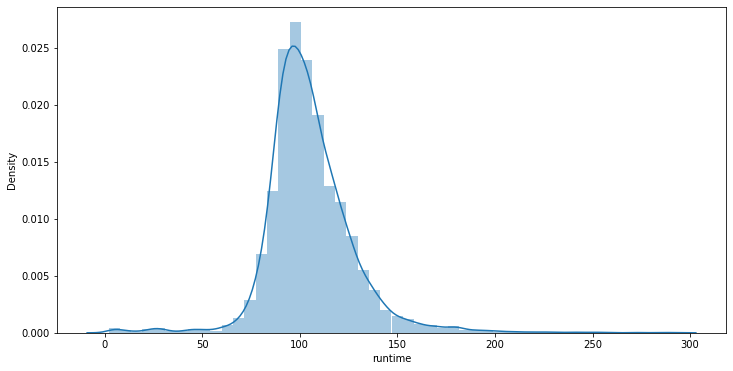

In [ ]:
movies['runtime'] = movies['runtime'].apply(convert_to_float_helper)
plt.figure(figsize=(12,6))
sns.distplot(movies[(movies['runtime'] < 300) & (movies['runtime'] > 0)]['runtime'])

In [ ]:
movies[['title', 'vote_count', 'year','revenue']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year,revenue
15480,Inception,14075.0,2010,8.255328e+08
12481,The Dark Knight,12269.0,2008,1.004558e+09
14551,Avatar,12114.0,2009,2.787965e+09
17818,The Avengers,12000.0,2012,1.519558e+09
26564,Deadpool,11444.0,2016,7.831130e+08
22879,Interstellar,11187.0,2014,6.751200e+08
20051,Django Unchained,10297.0,2012,4.253682e+08
23753,Guardians of the Galaxy,10014.0,2014,7.733286e+08
2843,Fight Club,9678.0,1999,1.008538e+08
18244,The Hunger Games,9634.0,2012,6.912107e+08


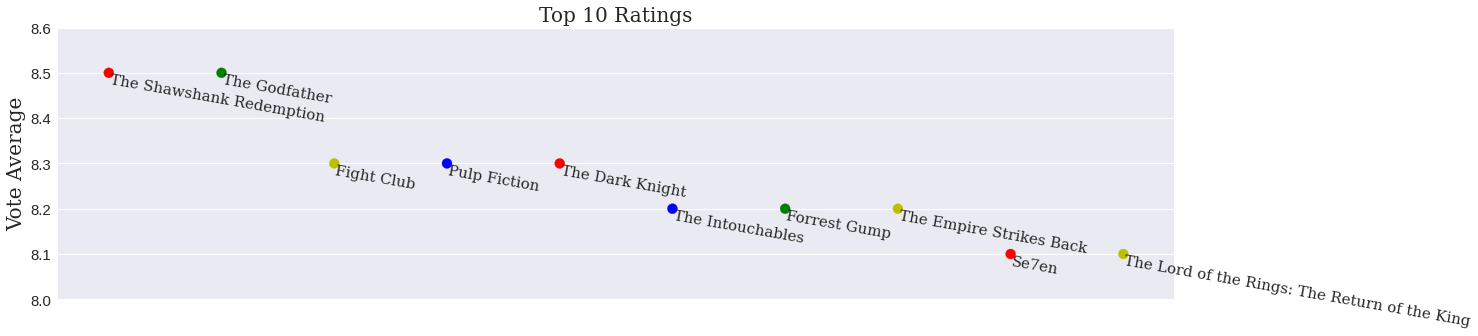

In [ ]:
cond = (movies.vote_count)>5000
ratings1 = movies.loc[cond, ['title', 'vote_average']].sort_values('vote_average', ascending=False)
top_10_ratings = ratings1.head(10)

plt.style.use('seaborn')
_ = top_10_ratings.plot(kind='scatter', x='title', y='vote_average', grid=True,
                        figsize=(20,5), fontsize=15, xticks='', ylim=(8,8.6), s=100, 
                        c=['r', 'g', 'y', 'b', 'r', 'b', 'g', 'y', 'r', 'y',]);
for i, (title, vote) in enumerate(zip(top_10_ratings.title, top_10_ratings.vote_average)):
    _ = plt.text(i, vote, title, rotation=-10, va='top', ha='left', 
                 fontsize=15, fontfamily='serif');
plt.ylabel('Vote Average', fontsize=20, fontfamily='serif');
plt.title('Top 10 Ratings', fontsize=20, fontfamily='serif')
plt.xlabel('');

Apabila dilihat dari jumlah rating (vote_average) terbanyak, maka yang menang yaitu antara The Shawnshank Redemption dan The Godfather. 

<a name="5"></a>
## Data Preprocessing 

### Melihat Missing Data

In [ ]:
movies_links.isnull().sum()

adult                       0
belongs_to_collection    7425
budget                      0
genres                      0
homepage                 7125
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   12
popularity                  0
poster_path                 3
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
status                      2
tagline                  2066
title                       0
video                       0
vote_average                0
vote_count                  0
year                        0
dtype: int64

In [ ]:
metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           3
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   6
poster_path                386
production_companies         0
production_countries         0
release_date                87
revenue                      6
runtime                    263
spoken_languages             0
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### Melakukan Penggabungan antara Overview dan Tagline 
Hal ini dikarenakan untuk content based, kita akan mencoba untuk melihat deskripsi film, yang akan diambil dari tagline dan overview. 

In [ ]:
movies_links['tagline'] = movies_links['tagline'].fillna('')
movies_links['description'] = movies_links['overview'] + movies_links['tagline']
movies_links['description'] = movies_links['description'].fillna('')

### Melakukan Drop pada Beberapa Columns
Setelah melihat missing values pada dataset, untuk melakukan handling, beberapa fitur akan didrop. Hal ini dikarenakan: 
1. Data pada fitur banyak yang hilang
2. Setelah dilakukan EDA, fitur tidak akan berpengaruh banyak pada model, sehingga dapat dihilangkan. 

In [ ]:
movies_links.drop(labels = ['adult', 'belongs_to_collection', 'homepage', 'poster_path', 'video', 'status'], axis='columns', inplace=True)
metadata.drop(labels = ['adult', 'belongs_to_collection', 'homepage', 'poster_path', 'video', 'status'], axis='columns', inplace=True)

In [ ]:
movies_links.isnull().sum()

budget                   0
genres                   0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                12
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
tagline                  0
title                    0
vote_average             0
vote_count               0
year                     0
description              0
dtype: int64

Karena yang lebih banyak akan kita gunakan berada pada Content Based yaitu data pada tabel movies_links, dan dapat dilihat bahwa yang memiliki missing values hanyalah tagline dan overview saja, yang sudah dimasukkan ke dalam kolom  baru, maka dapat kita abaikan. 

<a name="6"></a>
# Content Based

## Content Based Berbasis Description

### TF-IDF 
Untuk bagian content based, description yang berbasis string harus diextraksi terlebih dahulu untuk mengambil informasi yang penting. Hal ini dapat dilakukan dengan Word Embedding, dengan beberapa contoh metode seperti Bag of Words (BoW), TF-IDF, Word2Vec dkk.

Untuk bagian ini, kami akan menggunakan TF-IDF. TF-IDF atau ( Term Frequency(TF) — Inverse Dense Frequency(IDF) ) adalah teknik yang digunakan untuk menemukan makna kalimat yang terdiri dari kata-kata, sama seperti Bag of Words. TF-IDF berguna dalam memecahkan kelemahan utama Bag of words dengan memperkenalkan konsep penting yang disebut frekuensi dokumen terbalik.

Ini adalah skor yang disimpan machine di mana ia mengevaluasi kata-kata yang digunakan dalam sebuah kalimat dan mengukur penggunaannya dibandingkan dengan kata-kata yang digunakan di seluruh dokumen. Dengan kata lain, ini adalah skor untuk menyoroti relevansi setiap kata di seluruh dokumen.

In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_links['description'])
tfidf_matrix.shape

(9099, 268124)

### Menghitung Cosine Similarity dari word matrix
Dari matrix TFIDF yang sudah didapatkan, kita dapat mencari similaritas cosine yang dimiliki oleh setiap kata. Hal ini dilakukan untuk mencari kesamaan antara setiap deskripsi dengan lebih mudah. 

Cosine Similarity adalah salah satu algoritma di dalam teks mining, yang berfungsi untuk mengklasifikasikan suatu 
dokumen atau teks. Cosine similarity mempunyai konsep normalisasi panjang vektor dengan membandingkan dua 
dokumen antara dokumen A dan B.

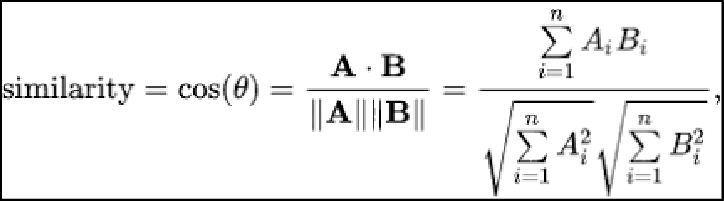

In [ ]:
cosine_sim_desc = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim_desc[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [ ]:
movies_links = movies_links.reset_index()
titles = movies_links['title']

# mengambil titel dari dataset movies_links. 
indices = pd.Series(movies_links.index, index=movies_links['title'])

In [ ]:
indices

title
Toy Story                                                0
Jumanji                                                  1
Grumpier Old Men                                         2
Waiting to Exhale                                        3
Father of the Bride Part II                              4
                                                      ... 
Shin Godzilla                                         9094
The Beatles: Eight Days a Week - The Touring Years    9095
Pokémon: Spell of the Unknown                         9096
Pokémon 4Ever: Celebi - Voice of the Forest           9097
Force Majeure                                         9098
Length: 9099, dtype: int64

#### Melakukan Rekomendasi Berdasarkan Content Based

In [ ]:
def get_recommendations(title, cosine_sim):
    # digunakan untuk melakukan fuzzy matching pada judul (apabila terdapat kesalahan minor)
    idx = fuzzy_matching(indices, title, verbose=True)
    index = indices[title]
    
    # melakukan kalkulasi cosine similarity dan mengambil data terdekatnya saja
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:51]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_movie, verbose=True):
    # mengembalikan yang paling mirip dengan ratio yang dimiliki oleh pemilik. 
    match_tuple = []
    # cari kecocokan
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 80:
            match_tuple.append((title, idx, ratio))
    # sortir
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('No match is found')
        return
    if verbose:
        print('Found possible {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

In [ ]:
get_recommendations('The Dark Knight', cosine_sim_desc).head(10)

Found possible ['The Dark Knight', 'The Dark Knight Rises']



7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

In [ ]:
get_recommendations('Spider-Man', cosine_sim_desc).head(10)

Found possible ['Spider-Man', 'Spider-Man 3', 'Spider-Man 2']



6676                 Spider-Man 3
8531     The Amazing Spider-Man 2
8066       The Amazing Spider-Man
5476                 Spider-Man 2
5219        Bang Bang You're Dead
4087                  The New Guy
7488                     Kick-Ass
1563    Gremlins 2: The New Batch
3057              Mad About Mambo
6432                    Clerks II
Name: title, dtype: object

Rekomendasi yang diberikan dengan penggunaan Content Based adalah sebagai berikut. Dapat dilihat bahwa rekomendasi-rekomendasi yang diberikan memiliki similaritas yang lumayan kuat, yang dilihat dari description yang sudah diberikan. 

## Content Based Berbasis Data Film
Selain mencari content based berdasarkan  deskripsi, content bases juga dapat dicari menggunakan data film. 

In [ ]:
metadata = metadata.merge(credits, on='id')
metadata = metadata.merge(keywords, on='id')

In [ ]:
metadata.head()

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords
0,30000000,"[Animation, Comedy, Family]",862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[Adventure, Fantasy, Family]",8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[Romance, Comedy]",15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000,"[Comedy, Drama, Romance]",31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,[Comedy],11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
movies_links = metadata[metadata['id'].isin(tmdb_df)]
movies_links['year'] = pd.to_datetime(movies_links['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] 
                                                                           if x != np.nan else np.nan)

In [ ]:
movies_links

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords,year
0,30000000,"[Animation, Comedy, Family]",862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995
1,65000000,"[Adventure, Fantasy, Family]",8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995
2,0,"[Romance, Comedy]",15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",1995
3,16000000,"[Comedy, Drama, Romance]",31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",1995
4,0,[Comedy],11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40952,8000000,[Drama],159550.0,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,[Nasser Entertainment],[United States of America],2001-09-23,0.0,85.0,[],NaN,The Last Brickmaker in America,7.0,1.0,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de...","[{'id': 6054, 'name': 'friendship'}, {'id': 20...",2001
41172,1000000,"[Thriller, Romance]",392572.0,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333139,[KriArj Entertainment],[India],2016-08-12,0.0,150.0,[हिन्दी],Decorated Officer. Devoted Family Man. Defendi...,Rustom,7.3,25.0,"[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de...","[{'id': 10540, 'name': 'bollywood'}]",2016
41225,15050000,"[Adventure, Drama, History, Romance]",402672.0,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,"[UTV Motion Pictures, Ashutosh Gowariker Produ...",[India],2016-08-11,16180000.0,155.0,[हिन्दी],NaN,Mohenjo Daro,6.7,26.0,"[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de...","[{'id': 10540, 'name': 'bollywood'}]",2016
41391,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",315011.0,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit 

In [ ]:
movies_links['cast'] = movies_links['cast'].apply(literal_eval)
movies_links['crew'] = movies_links['crew'].apply(literal_eval)
movies_links['keywords'] = movies_links['keywords'].apply(literal_eval)
movies_links['cast_size'] = movies_links['cast'].apply(lambda x: len(x))
movies_links['crew_size'] = movies_links['crew'].apply(lambda x: len(x))

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
movies_links['director'] = movies_links['crew'].apply(get_director)

In [ ]:
movies_links['cast'] = movies_links['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_links['cast'] = movies_links['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [ ]:
movies_links['keywords'] = movies_links['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
movies_links['cast'] = movies_links['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
movies_links['director'] = movies_links['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
movies_links['director'] = movies_links['director'].apply(lambda x: [x,x])

In [ ]:
movies_links

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords,year,cast_size,crew_size,director
0,30000000,"[Animation, Comedy, Family]",862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",1995,13,106,"[johnlasseter, johnlasseter]"
1,65000000,"[Adventure, Fantasy, Family]",8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[robinwilliams, jonathanhyde, kirstendunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",1995,26,16,"[joejohnston, joejohnston]"
2,0,"[Romance, Comedy]",15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[waltermatthau, jacklemmon, ann-margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",1995,7,4,"[howarddeutch, howarddeutch]"
3,16000000,"[Comedy, Drama, Romance]",31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[whitneyhouston, angelabassett, lorettadevine]","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin...",1995,10,10,"[forestwhitaker, forestwhitaker]"
4,0,[Comedy],11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[stevemartin, dianekeaton, martinshort]","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug...",1995,12,7,"[charlesshyer, charlesshyer]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40952,8000000,[Drama],159550.0,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,[Nasser Entertainment],[United States of America],2001-09-23,0.0,85.0,[],NaN,The Last Brickmaker in America,7.0,1.0,"[sidneypoitier, wendycrewson, jayo.sanders]","[{'credit_id': '544475aac3a36819fb000578', 'de...","[friendship, brick making]",2001,7,2,"[greggchampion, greggchampion]"
41172,1000000,"[Thriller, Romance]",392572.0,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333139,[KriArj Entertainment],[India],2016-08-12,0.0,150.0,[हिन्दी],Decorated Officer. Devoted Family Man. Defendi...,Rustom,7.3,25.0,"[akshaykumar, ileanad'cruz, eshagupta]","[{'credit_id': '5951baf692514129c4016600', 'de...",[bollywood],2016,14,16,"[tinusureshdesai, tinusureshdesai]"
41225,15050000,"[Adventure, Drama, History, Romance]",402672.0,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,"[UTV Motion Pictures, Ashutosh Gowariker Produ...",[India],2016-08-11,16180000.0,155.0,[हिन्दी],NaN,Mohenjo Daro,6.7,26.0,"[hrithikroshan, poojahegde, kabirbedi]","[{'credit_id': '57cd5d3592514179d50018e8', 'de...",[b

In [ ]:
s = movies_links.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [ ]:
s = s.value_counts()
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

In [ ]:
s = s[s > 1]

In [ ]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [ ]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [ ]:
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9219 entries, 0 to 41669
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9219 non-null   object 
 1   genres                9219 non-null   object 
 2   id                    9219 non-null   float64
 3   imdb_id               9219 non-null   object 
 4   original_language     9219 non-null   object 
 5   original_title        9219 non-null   object 
 6   overview              9207 non-null   object 
 7   popularity            9219 non-null   float64
 8   production_companies  9219 non-null   object 
 9   production_countries  9219 non-null   object 
 10  release_date          9219 non-null   object 
 11  revenue               9219 non-null   float64
 12  runtime               9219 non-null   float64
 13  spoken_languages      9219 non-null   object 
 14  tagline               7082 non-null   object 
 15  title               

In [ ]:
movies_links['soup'] = movies_links['keywords'] + movies_links['cast'] + movies_links['director'] + movies_links['genres']
movies_links['soup'] = movies_links['soup'].apply(lambda x: ' '.join(x))

In [ ]:
movies_links.head(1)

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords,year,cast_size,crew_size,director,soup
0,30000000,"[Animation, Comedy, Family]",862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",1995,13,106,"[johnlasseter, johnlasseter]",jealousy toy boy friendship friends rivalry bo...


### Count Vectorizer
Count Vectorizer adalah metode lain yang dapat digunakan untuk melakukan ekstraksi makna dari teks. Count Vectorizer adalah suatu cara untuk membuat vector kalimat. Tujuannya untuk mengambil kata-kata dari setiap kalimat dan menciptakan vocabulary dari semua kata unik dalam kalimat. Vocabulary ini kemudian dapat digunakan untuk membuat feature vector dari jumlah kata. 

In [ ]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(movies_links['soup'])

### Menghitung Cosine Similarity dari Word Matrix

In [ ]:
cosine_sim_crew = cosine_similarity(count_matrix, count_matrix)

In [ ]:
movies_links = movies_links.reset_index()
titles = movies_links['title']
indices = pd.Series(movies_links.index, index=movies_links['title'])

In [ ]:
get_recommendations('The Dark Knight', cosine_sim_crew).head(10)

Found possible ['The Dark Knight', 'The Dark Knight Rises']



6218                 Batman Begins
8031         The Dark Knight Rises
7659    Batman: Under the Red Hood
1260                Batman & Robin
1134                Batman Returns
524                         Batman
2131                      Superman
132                 Batman Forever
8467                    Kick-Ass 2
8001              Batman: Year One
Name: title, dtype: object

In [ ]:
get_recommendations('Spider-Man', cosine_sim_crew).head(10)

Found possible ['Spider-Man', 'Spider-Man 3', 'Spider-Man 2']



6757              Spider-Man 3
5538              Spider-Man 2
8521      Thor: The Dark World
271     The Quick and the Dead
7600                Iron Man 2
8869                   Ant-Man
3049                     X-Men
7969              The Avengers
8870            Fantastic Four
8450             The Wolverine
Name: title, dtype: object

Terdapat beberapa perubahan dalam rekomendasi yang diberikan oleh sistem. Hal ini dikarenakan untuk content based yang data film lebih menitikberatkan terhadap kesamaan pembuat film daripada isi dari film. 

<a name="7"></a>
# Collaborative Filtering 
Untuk Collaborative Filtering, akan dilakukan beberapa perbandingan algoritma yaitu SVD(), NMF(), SVDpp(), NormalPredictor(), KNNBaseline(), KNNBasic(), BaselineOnly(), CoClustering() untuk memprediksi rating yang diberikan oleh user. Setiap user memiliki preferensi masing-masing terhadap film yang disenanginya, maka tujuan dari Collaborative Filtering ini adalah untuk memprediksi rating berdasarkan preferensi tersebut. 

 Akurasi yang digunakan untuk melakukan perbandingan yaitu RMSE. RMSE atau Root Mean Square Error digunakan dalam analisis perbandingan data lapangan dengan data hasil proses yang diolah untuk mengetahui tingkat kesalahan yang terjadi.

Semakin kecil RMSE yang diberikan semakin bagus, maka kita harus mencari RMSE paling kecil di antara yang lain.

1. SVD : Singular Value Decomposition, yaitu faktoriasi matrix menjadi 3 matriks yang berbeda. 

2. SVD++ : extensi dari SVD dengan mempertimbangkan peringkat implisit.

3. NMF (Non Negative Matrix Factorizaton)  Algoritma penyaringan kolaboratif berdasarkan non-negative matrix factorization. Algoritma yg digunakan untuk menguraikan matriks istilah dokumen menjadi dua matriks yang lebih kecil — matriks topik dokumen (U) dan matriks istilah topik (W) — masing-masing diisi dengan probabilitas yang tidak dinormalisasi. 


4. NormalPredictor : algoritma yang memprediksi rating random berdasarkan distribusi traninig set yang diasumsikan normal.

5. KNNBaseline : Basic Algoritma collaborative filtering dengan pendekatan neighbors dengan mempertimbangkan baseline.

6. KNNBasic : Basic Algoritma collaborative filtering dengan pendekatan neighbors .

7. BaselineOnly : Algoritma memprediksi perkiraan dasar untuk pengguna dan item tertentu.

8. CoClustering : Algoritma yang memungkinkan untuk secara bersamaan mengelompokkan objek dan fitur dalam matriks, menghasilkan cluster baris dan kolom.

### Menentukan Algoritma Prediksi dengan Performa Terbaik

In [ ]:
reader = Reader()

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data

In [ ]:
from surprise.model_selection import KFold
kf = KFold(n_splits=3)

kf.split("data")

<generator object KFold.split at 0x7f06a1402c50>

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
benchmark = []
# iterasi semua algoritma
for algorithm in [SVD(), NMF(), SVDpp(), NormalPredictor(), KNNBaseline(), KNNBasic(), BaselineOnly(), CoClustering()]:
    # cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # masukkan data ke dalam sebuah dataframe
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usin

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.884700,423.245584,9.124505
BaselineOnly,0.893247,0.427643,0.150988
SVD,0.896759,5.243765,0.205137
KNNBaseline,0.897155,0.568720,1.835092
NMF,0.946780,6.054659,0.181162
CoClustering,0.962293,2.656418,0.102843
KNNBasic,0.966165,0.149703,1.573115
NormalPredictor,1.436504,0.145332,0.187510


Dapat dilihat dari tabel bahwa yang memiliki performa terbaik adalah SVD++, dengan RMSE 0.886. Walau begitu, waktu yang dibutuhkan untuk fitting sangatlah tidak efisien, yaitu 440, sedangkan yang lain di bawah 10. Maka dari itu, untuk ini kita juga akan mengecek algoritma BaselineOnly, KNNBaseline, dan SVD yang memiliki akurasi RMSE di bawah 0.9 akan tetapi memiliki fit time yang lebih bagus daripada SVD++. 

### Hyper Parameter Tuning

In [ ]:
# from surprise.model_selection import GridSearchCV

# param_grid = {'n_factors': [50, 100, 200], 'n_epochs': [10, 15, 20], 'lr_all': [0.002, 0.005, 0.1],
#               'reg_all': [0.02, 0.04, 0.06]}
# gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=5)

# gs.fit(data)

# # skor terbaik
# print(gs.best_score['rmse'])

# # kombinasi parameter paling baik
# print(gs.best_params['rmse'])

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'bsl_options' : {'method': ['als', 'sgd']
               }
              }
bs = GridSearchCV(BaselineOnly, param_grid, measures=['rmse', 'mae'], cv=5)

bs.fit(data)

# skor terbaik
print(bs.best_score['rmse'])

# kombinasi parameter paling baik
print(bs.best_params['rmse'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
0.8907173983897545
{'bsl_options': {'method': 'sgd'}}


Parameter paling bagus untuk algoritma BaselineOnly yaitu dengan mengoptimasisasi SGD (Stochastic Gradient Descent). Akan tetapi score yang didapatkan masih lumayan tinggi, sehingga akan mencoba pada algoritma lain terlebih dahulu untuk melakukan komparasi. 

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [50, 100, 200], 'n_epochs': [10, 15, 20], 'lr_all': [0.002, 0.005, 0.1],
              'reg_all': [0.02, 0.04, 0.06]}
svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

svd.fit(data)

# skor terbaik
print(svd.best_score['rmse'])

# kombinasi parameter paling baik
print(svd.best_params['rmse'])

0.8902254927940433
{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.06}


Score yang didapatkan dengan menggunakan SVD setelah dilakukan hyperparameter tuning juga masih lumayan tinggi yaitu 0.89, sehingga akan dilakukan 1 kali lagi tuning terhadap KNNBaseline. 

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'user_based': [True, False]}
              }
knn = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=5)

knn.fit(data)

#  skor terbaik
print(knn.best_score['rmse'])

# kombinasi parameter paling baik
print(knn.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Score yang didapatkan yaitu 0.87 merupakan hasil yang paling rendah setelah dilakukan tuning. Tuning pada KNN Baseline dilakukan dengan menggunakan pearson_baseline dan user-based diset ke False. 

In [ ]:
algo = knn.best_estimator['rmse']
algo.fit(data.build_full_trainset())

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
ratings.loc[(ratings['rating'] >= 3) & (ratings['rating'] <= 5)]

,userId,movieId,rating,timestamp
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
4,1,1172,4.0,1260759205
8,1,1339,3.5,1260759125
12,1,1953,4.0,1260759191
...,...,...,...,...
99996,671,5991,4.5,1064245387
99997,671,5995,4.0,1066793014
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363


In [ ]:
ratings.loc[(ratings['movieId'] == 558.0)]

,userId,movieId,rating,timestamp
19069,128,558,3.0,1049684826
38917,285,558,4.0,965542864
47125,346,558,1.0,1044650181
62789,453,558,2.0,994622582
73615,514,558,1.0,853894938
74190,518,558,3.0,945362557
76612,530,558,2.0,882388845
83154,564,558,4.0,974790913
89192,595,558,4.0,965230453


In [ ]:
metadata.loc[(metadata['title'] == 'Spider-Man 2')]

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords
7985,200000000,"[Action, Adventure, Fantasy]",558.0,tt0316654,en,Spider-Man 2,Peter Parker is going through a major identity...,10.834506,"[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America],2004-06-25,783766341.0,127.0,"[English, Pусский, 普通话]",There's a hero in all of us.,Spider-Man 2,6.7,4432.0,"[{'cast_id': 33, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f8015039', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ..."


In [ ]:
algo.predict(671, 6568, 3)

Prediction(uid=671, iid=6568, r_ui=3, est=3.364883683320165, details={'actual_k': 6, 'was_impossible': False})

<a name="8"></a>
# Hybrid Implementation
Hybrid Implementation akan menggabungkan antara Content Based dengan Collaborative Filtering dengan cara: 
1. Mengambil rekomendasi berdasarkan content based sesuai dengan judul
2. Mengambil/melakukan ranking sesuai dengan preferensi setiap user dengan cara menggunakan collaborative filtering untuk memprediksi estimasi rating yang akan diberikan oleh user kepada rekomendasi yang diberikan. Metode hanya akan mengambil 10 teratas. 

In [ ]:
links_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [ ]:
mapping_id = links_small[['movieId', 'tmdbId']]
mapping_id.rename(columns = {'tmdbId':'id'}, inplace = True)
mapping_id = mapping_id.merge(movies_links[['title', 'id']], on='id').set_index('title')

In [ ]:
indices_map = mapping_id.set_index('id')

In [ ]:
def hybrid(userId, title):
    def get_index(title):
        idx = indices[title]
        tmdbId = mapping_id.loc[title]['id']
        movie_id = mapping_id.loc[title]['movieId']
        return idx, tmdbId, movie_id
    
    def get_content_based(title):
        idx, tmdbId, movie_id = get_index(title)
        # content based
        similarity_score = list(enumerate(cosine_sim_crew[int(idx)]))
        similarity_score  = sorted(similarity_score , key=lambda x: x[1], reverse=True)
        similarity_score  = similarity_score [1:26]
        movie_indices = [i[0] for i in similarity_score]
        return movie_indices

    def get_collaborative_filtering(userId, title):
        movie_indices = get_content_based(title)
        # prediksi rating --> collaborative filtering
        movies = movies_links.iloc[movie_indices][['title', 'year', 'vote_count', 'vote_average', 'id']]
        movies['est'] = movies['id'].apply(lambda x: algo.predict(userId, indices_map.loc[x]['movieId']).est)
        movies = movies.sort_values('est', ascending=False)
        return movies.head(10)

    recommend_movies = get_collaborative_filtering(userId, title)
    return recommend_movies
    

In [ ]:
hybrid(671, 'The Last Laugh')

,title,year,vote_count,vote_average,id,est
754,Sunset Boulevard,1950,533.0,8.2,599.0,4.289300
171,Smoke,1995,115.0,7.2,10149.0,4.051021
5016,The Birth of a Nation,1915,109.0,6.4,618.0,3.968531
7980,The Artist,2011,1075.0,7.3,74643.0,3.923881
5491,The Immigrant,1917,55.0,7.5,47653.0,3.894173
976,Withnail & I,1987,173.0,7.4,13446.0,3.812552
207,Ed Wood,1994,639.0,7.3,522.0,3.758525
7699,Buster Keaton: A Hard Act to Follow,1987,3.0,7.7,59572.0,3.720408
5386,Sunrise: A Song of Two Humans,1927,155.0,7.9,631.0,3.707272
1109,Nosferatu,1922,373.0,7.7,653.0,3.694016


In [ ]:
get_recommendations('The Last Laugh', cosine_sim_crew)

Found possible ['The Last Laugh']



3505                                               Faust
5386                       Sunrise: A Song of Two Humans
7980                                          The Artist
788                                   The Scarlet Letter
5468                                     The Kid Brother
4250                                                Tabu
1109                                           Nosferatu
7699                 Buster Keaton: A Hard Act to Follow
7040                                   The Mark of Zorro
2540                                          Three Ages
171                                                Smoke
5491                                       The Immigrant
2694                               The Perils of Pauline
754                                     Sunset Boulevard
5016                               The Birth of a Nation
5723                                       Pandora's Box
976                                         Withnail & I
4356                           

In [ ]:
get_recommendations('Spider-Man 2', cosine_sim_crew)

Found possible ['Spider-Man 2', 'Spider-Man 3', 'Spider-Man']



6757                                        Spider-Man 3
4119                                          Spider-Man
8636                            The Amazing Spider-Man 2
8868                             Avengers: Age of Ultron
8521                                Thor: The Dark World
2133                                        Superman III
8872                          Captain America: Civil War
271                               The Quick and the Dead
6785              Fantastic 4: Rise of the Silver Surfer
8869                                             Ant-Man
8450                                       The Wolverine
7969                                        The Avengers
1900                                           Red Sonja
8370                          Oz: The Great and Powerful
7861                                                Thor
7938                                  30 Minutes or Less
8658                          X-Men: Days of Future Past
6521                           

In [ ]:
hybrid(564, 'Spider-Man 2')

,title,year,vote_count,vote_average,id,est
3049,X-Men,2000,4172.0,6.8,36657.0,3.980020
8869,Ant-Man,2015,6029.0,7.0,102899.0,3.922224
7969,The Avengers,2012,12000.0,7.4,24428.0,3.841183
2132,Superman II,1980,642.0,6.5,8536.0,3.813367
8868,Avengers: Age of Ultron,2015,6908.0,7.3,99861.0,3.652078
4119,Spider-Man,2002,5398.0,6.8,557.0,3.556719
8658,X-Men: Days of Future Past,2014,6155.0,7.5,127585.0,3.517586
8872,Captain America: Civil War,2016,7462.0,7.1,271110.0,3.515695
8636,The Amazing Spider-Man 2,2014,4274.0,6.5,102382.0,3.507092
8166,The Amazing Spider-Man,2012,6734.0,6.5,1930.0,3.479985


<a name="9"></a>
# Hasil Pembahasan

Beberapa analisis yang didapatkan selama pembuatan project ini yaitu: 
1. Hasil rekomendasi dari Content Based tidak menjamin user akan menyukai hasil tanpa melihat preferensi dari mereka sendiri. Hal ini dikarenakan hasil rekomendasi Content-Based yang hanya melihat dari kesamaan keywords/text yang ada. 
2. Penggunaan metode ekstraksi teks menjadi vector berpengaruh terhadap hasil yang didapatkan untuk membuat sistem rekomendasi. Hal ini dikarenakan setiap metode vektorisasi tersebut memiliki kegunaan masing-masing. Pada percobaan content based description, penggunaan TF-IDF digunakan untuk memastikan bahwa importance dari kata tersebut dihitung, sedangkan dikarenakan TF-IDF lemah dalam melihat informasi dan similaritas terhadap kata tersebut, CountVectorizer digunakan dalam percobaan kedua yaitu Content Based berbasis Data Film. 
3. Terdapat berbagai metode yang dapat digunakan untuk melakukan Collaborative Filtering, seperti SVD, KNN, CoClustering dan sebagainya. Akurasi diambil dari prediksi terhadap rating suatu film, sesuai dengan preferensi dari setiap usernya, dan dihitung menggunakan RMSE. 


Dari percobaan yang telah dilakukan dan perbandingan antara penggunaan content-based dan hybrid implementation di atas, dapat dilihat bahwa menggunakan implementasi hybrid dapat membuat recommender system yang sebelumnya kita miliki menjadi lebih akurat dikarenakan preferensi user sendiri ikut dijadikan kalkulasi dalam pembuatan recommender system. 

Pada pengambilan recommender system dengan cara content based, terdapat berbagai pilihan film yang direkomendasikan oleh model, akan tetapi sebagai user yang akan memanfaatkan sistem rekomendasi sesuai dengan habit/preferensi sendiri, adanya recommender system yang lebih personal dapat membuat user menjadi semakin percaya terhadap data/pilihan yang disajikan. Metode CF adalah teknik yang sangat efektif untuk penerapan MRS dan integrasinya dengan teknik lain dapat mengarahkan kita ke pendekatan yang lebih meyakinkan untuk pembuatan recommender system. 
